# Logistic regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Create the model

- **Linear model**: 
$f(X) = WX + b$

- **Sigmoid**:
$S(z)= \frac{1}{1+e^{-z}}$

- **Approximation**:
$\hat{y} = S(f(x))$

- **Cost function**:
$J(W, b) = -\frac{1}{n} \sum_{i=1}^{n}[y_i \log(f(x_i)) + (1-y_i)\log(1-f(x_i))]$

- **Gradients**:
    - $\frac{\partial J(W,b)}{\partial W} = \frac{1}{n} \sum 2x_i(Wx_i + b - y_i)$
    - $\frac{\partial J(W,b)}{\partial b} = \frac{1}{n} \sum 2(Wx_i + b - y_i)$
    - In practice, we can get ride of the scaling factor $(2)$.

- **Gradient descent**:
    - $W = W - \alpha \frac{\partial J(W,b)}{\partial W}$
    - $b = b - \alpha \frac{\partial J(W,b)}{\partial b}$

In [2]:
class LogisticRegression:
    def __init__(self, n_iter: int = 1000, learning_rate: float = 0.001) -> None:
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.cost_history = np.zeros(n_iter)

    def _init_weights(self, n: int) -> None:
        self.W = np.zeros(n)
        self.b = np.random.randn(1)

    def _cost(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.mean(-y_true*np.log(y_pred) - (1-y_true)*np.log(1 - y_pred))

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        m, n = X.shape
        self._init_weights(n)

        for i in range(self.n_iter):
            y_pred = self._sigmoid(X.dot(self.W) + self.b)
            self.cost_history[i] = self._cost(y, y_pred)
            self.W -= self.learning_rate * (X.T.dot(y_pred - y) / m)
            self.b -= self.learning_rate * (np.sum(y_pred - y) / m)

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = self._sigmoid(X.dot(self.W) + self.b)
        return np.array([1 if y >= 0.5 else 0 for y in y_pred])

    def score(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.mean(y_true == y_pred)

In [3]:
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, (iris.target != 0) * 1, test_size=0.2, shuffle=True, random_state=0)

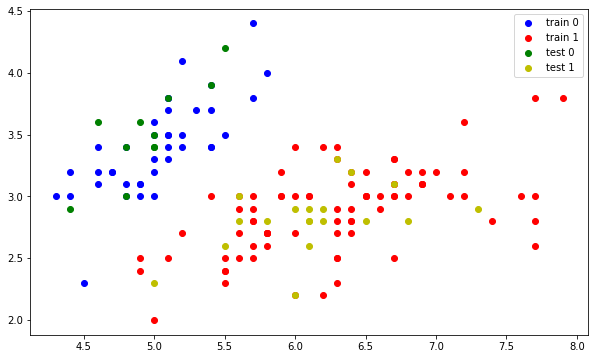

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], color='b', label='train 0')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], color='r', label='train 1')
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], color='g', label='test 0')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], color='y', label='test 1')
plt.legend();

In [5]:
model = LogisticRegression(n_iter=10000)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [6]:
print(f"Score on training data: {model.score(y_train, model.predict(x_train))}")
print(f"Score on testing data: {model.score(y_test, pred)}")

Score on training data: 1.0
Score on testing data: 1.0


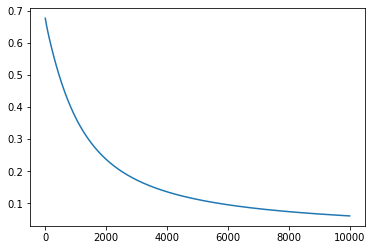

In [7]:
plt.plot(model.cost_history)